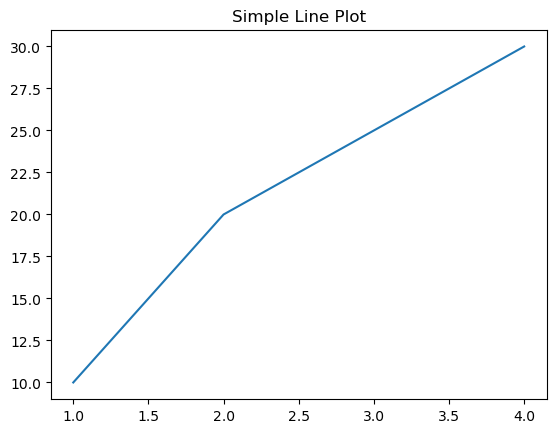

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[10,20,25,30])
plt.title("Simple Line Plot")
plt.show()


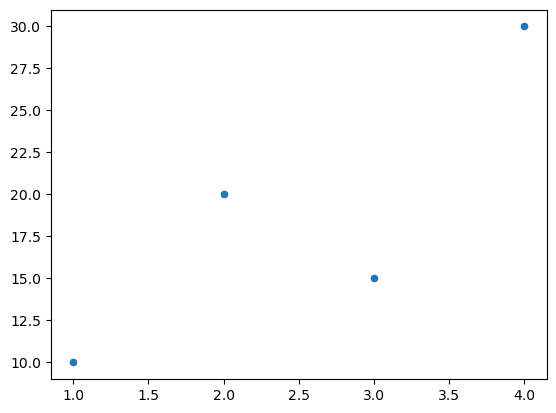

In [3]:
import seaborn as sns
sns.scatterplot(x=[1,2,3,4], y=[10,20,15,30])
plt.show()


In [7]:
import numpy as np
advertising_budget = np.random.randint(10, 100, 50)


In [8]:
advertising_budget

array([24, 35, 20, 43, 65, 91, 66, 75, 92, 78, 92, 73, 96, 34, 81, 11, 89,
       70, 49, 95, 94, 81, 31, 45, 34, 30, 96, 88, 99, 79, 88, 94, 59, 40,
       28, 68, 43, 74, 35, 66, 96, 69, 34, 81, 86, 56, 63, 68, 34, 24],
      dtype=int32)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [10]:
np.random.seed(42)

In [13]:
advertising_budget = np.random.randint(10, 100, 50)

# Generate sales data (somewhat linear relation + random noise)
sales = 3.5 * advertising_budget + np.random.randint(-50, 50, 50)

# Create DataFrame
df = pd.DataFrame({
    'Advertising Budget (k$)': advertising_budget,
    'Sales (units)': sales
})

print("📊 First 5 Rows of Dataset:")
print(df.head())

📊 First 5 Rows of Dataset:
   Advertising Budget (k$)  Sales (units)
0                       88          324.0
1                       68          206.0
2                       41          112.5
3                       97          384.5
4                       61          233.5


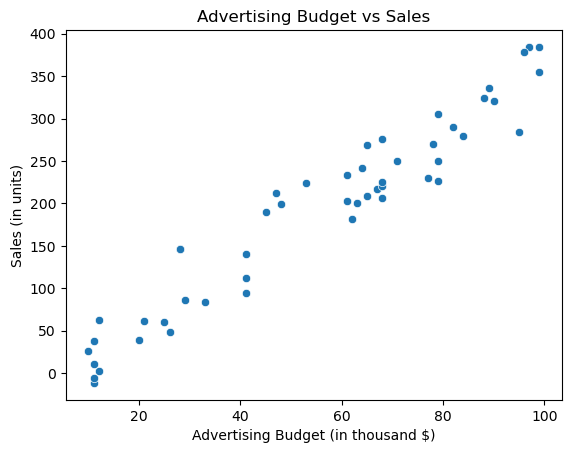

In [14]:
sns.scatterplot(x='Advertising Budget (k$)', y='Sales (units)', data=df)
plt.title("Advertising Budget vs Sales")
plt.xlabel("Advertising Budget (in thousand $)")
plt.ylabel("Sales (in units)")
plt.show()

In [15]:
X = df[['Advertising Budget (k$)']]  # feature
y = df['Sales (units)']   

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📈 Model Evaluation:
Mean Squared Error (MSE): 1097.85
R² Score: 0.88


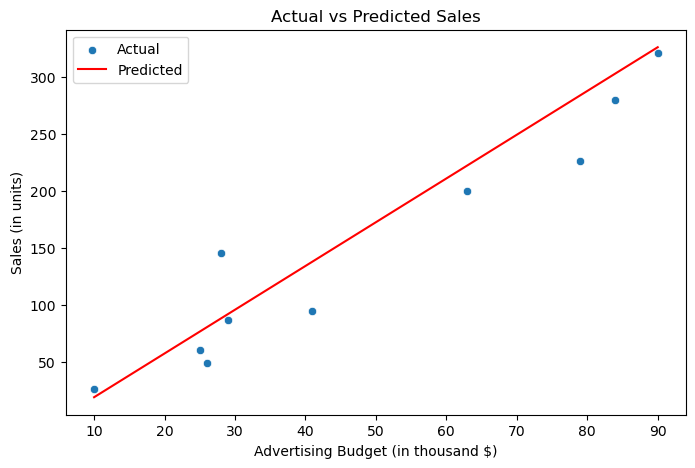

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, label="Actual")
sns.lineplot(x=X_test.values.flatten(), y=y_pred, color='red', label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Advertising Budget (in thousand $)")
plt.ylabel("Sales (in units)")
plt.legend()
plt.show()